In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
from keras.models import Model, Sequential
from keras.layers import Dense
from keras.regularizers import l1, l2
from keras.callbacks import LambdaCallback

In [2]:
sns.set_style('darkgrid')

### Settings

In [3]:
# number of samples in the data set
N_SAMPLES = 2000
# ratio between training and test sets
TEST_SIZE = 0.2
# boundary of the graph
GRID_PADDING = 0.5
GRID_STEP = 0.01
# number of iterations of the neural network
N_EPOCHS = 200
# index of the layer we want to visualize
LAYER_INDEX = 2

### Create artificial dataset

In [4]:
X, y = make_moons(n_samples = N_SAMPLES, noise = 0.4, shuffle = True, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = 21)

In [5]:
xmin, xmax = X[:, 0].min() - GRID_PADDING, X[:, 0].max() + GRID_PADDING 
ymin, ymax = X[:, 1].min() - GRID_PADDING, X[:, 1].max() + GRID_PADDING 
XX, YY = np.meshgrid(np.arange(xmin, xmax, GRID_STEP), np.arange(ymin, ymax, GRID_STEP))

### Auxillary plotting function

In [22]:
# function making the graph of the dataset
def make_plot(X, y, plot_name, XX = None, YY = None, preds = None):
    plt.figure(figsize = (10, 10))
    axes = plt.gca()
    axes.set_xlim([xmin,xmax])
    axes.set_ylim([ymin,ymax])
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize = 20)
    
    if XX is not None and YY is not None and preds is not None:
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, cmap = cm.Spectral, alpha = 0.6)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels = [0.5], cmap = 'Greys', vmin = 0, vmax = 0.6)
    
    plt.scatter(x = X[:, 0], y = X[:, 1], c = y.ravel(), cmap = plt.cm.Spectral, s = 40, edgecolors = 'black')

In [37]:
# function creating weight matrix graph
def plot_weights_matrix(model, LAYER_ID, plot_name):
    weights = model.layers[LAYER_ID].get_weights()[0]
    min_val = round(weights.min(), 2)
    max_val = round(weights.max(), 2)
    mean_val = round(weights.mean(), 2)
    
    shape = weights.shape
    
    X, Y = np.array(range(shape[1])), np.array(range(shape[0]))
    X, Y = np.meshgrid(X, Y)
    plt.style.use('dark_background')
    fig = plt.figure(figsize = (12,12))
    ax = fig.gca(projection = '3d')
    plt.title("\n" + plot_name + "\n[MIN: " + str(min_val) + ", MAX: " + str(max_val) + ", MEAN: " + str(mean_val) + "]", fontsize = 20, y = 1.05)
    surf = ax.plot_surface(X, Y, weights, cmap = plt.get_cmap('rainbow'), linewidth = 0)          ##??    ##IMP

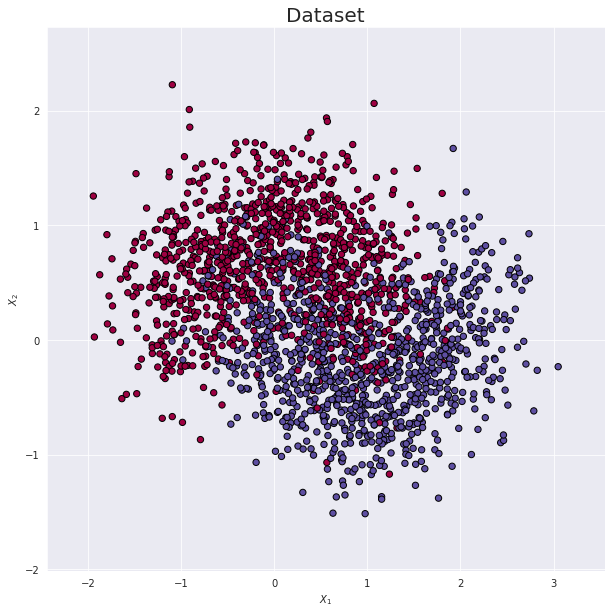

In [8]:
make_plot(X, y, 'Dataset')

### Neural network without regularisation (high variance)

In [9]:
model_1 = Sequential()
model_1.add(Dense(8, input_dim=2,activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

history = model_1.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)

In [10]:
y_train_pred_1 = model_1.predict_classes(X_train)
y_test_pred_1 = model_1.predict_classes(X_test)
train_acc = accuracy_score(y_train, y_train_pred_1)
test_acc = accuracy_score(y_test, y_test_pred_1)
print("Train accuracy: " + str(train_acc))
print("Test accuracy: " + str(test_acc))

Train accuracy: 0.885
Test accuracy: 0.855


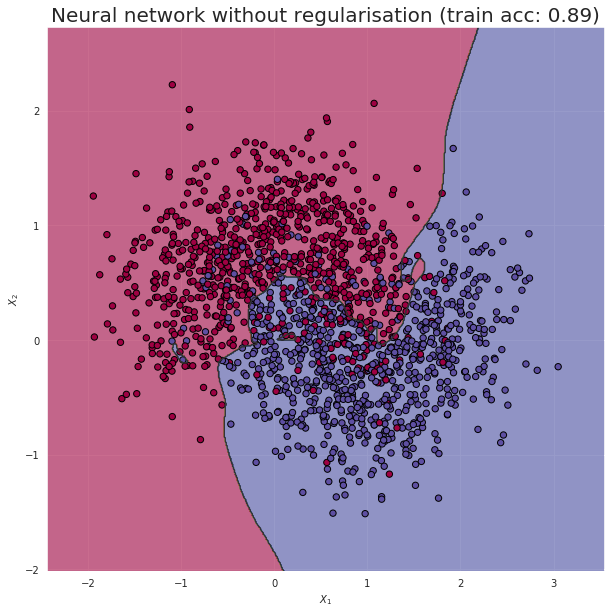

In [24]:
preds = model_1.predict_classes(np.c_[XX.ravel(), YY.ravel()])
title = "Neural network without regularisation (train acc: {0:.2f})".format(train_acc)
make_plot(X_train, y_train, title, XX, YY, preds)

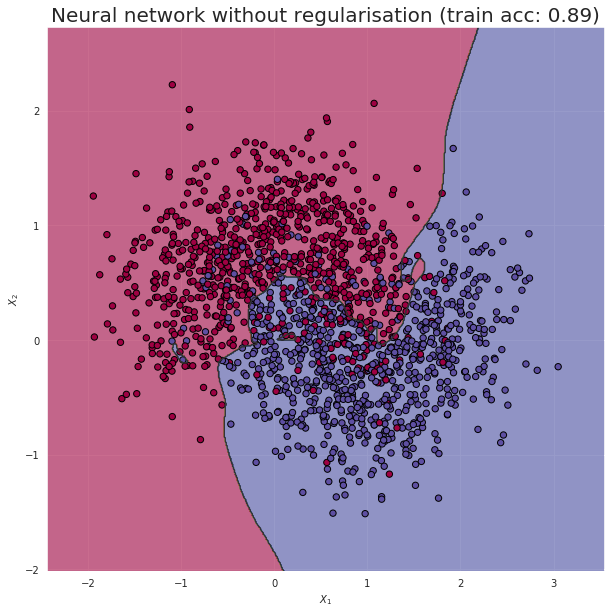

In [25]:
preds = model_1.predict_classes(np.c_[XX.ravel(), YY.ravel()])
title = "Neural network without regularisation (train acc: {0:.2f})".format(train_acc)
make_plot(X_train, y_train, title, XX, YY, preds)

In [34]:
model_1.layers[LAYER_INDEX].get_weights()[0].shape

(32, 128)

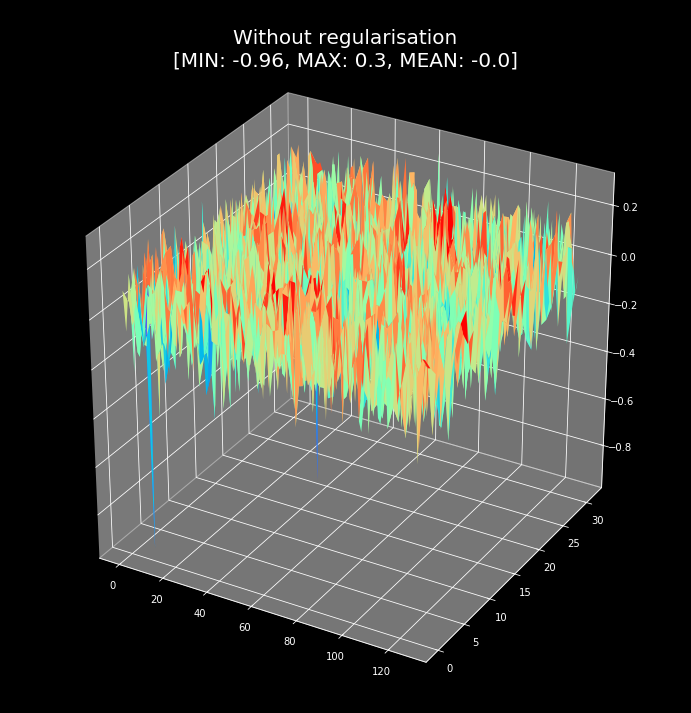

In [38]:
plot_weights_matrix(model_1, LAYER_INDEX, "Without regularisation")

### Neural network with regularisation 

In [41]:
def build_model_with_regularization(_lambda):
    model = Sequential()
    model.add(Dense(8, input_dim=2,activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(128, activation='relu', kernel_regularizer = l2(_lambda)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu', kernel_regularizer = l2(_lambda)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
    return model

== MODEL FOR LAMBDA 1e-05 ==
Train accuracy: 0.880625
Test accuracy: 0.865
== MODEL FOR LAMBDA 0.0001 ==
Train accuracy: 0.885625
Test accuracy: 0.87
== MODEL FOR LAMBDA 0.001 ==
Train accuracy: 0.878125
Test accuracy: 0.8625
== MODEL FOR LAMBDA 0.01 ==
Train accuracy: 0.875625
Test accuracy: 0.8475
== MODEL FOR LAMBDA 0.1 ==
Train accuracy: 0.875625
Test accuracy: 0.87
== MODEL FOR LAMBDA 1 ==
Train accuracy: 0.87
Test accuracy: 0.85


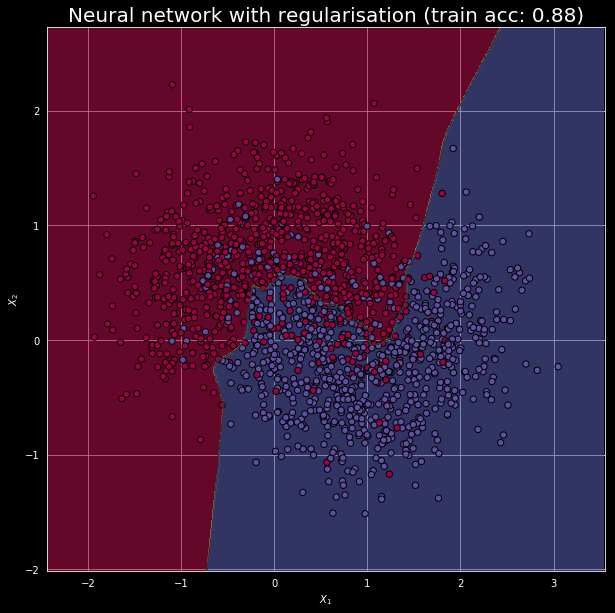

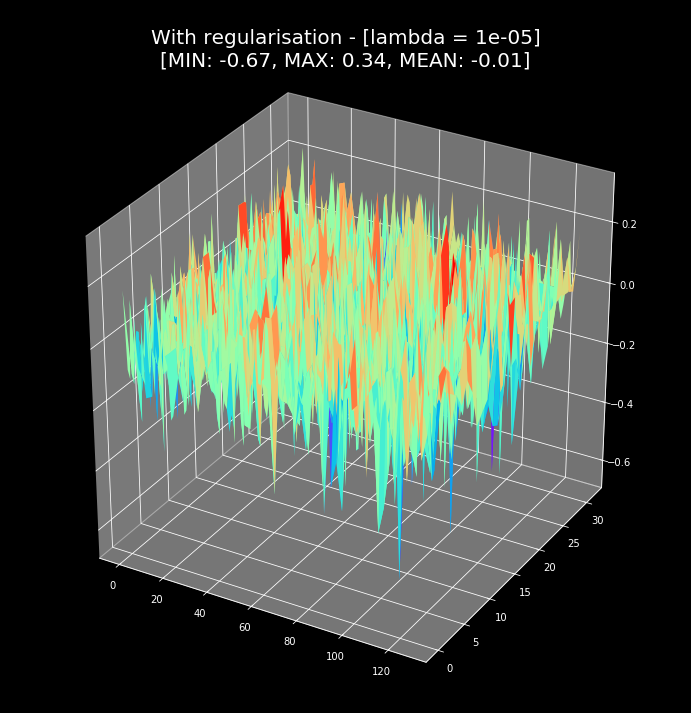

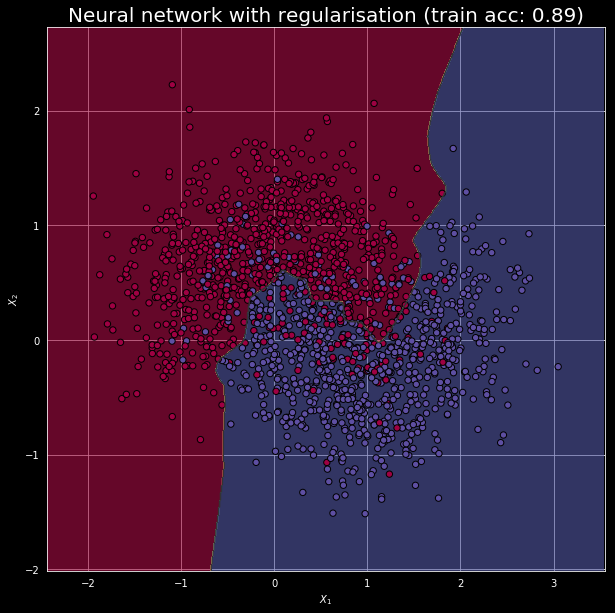

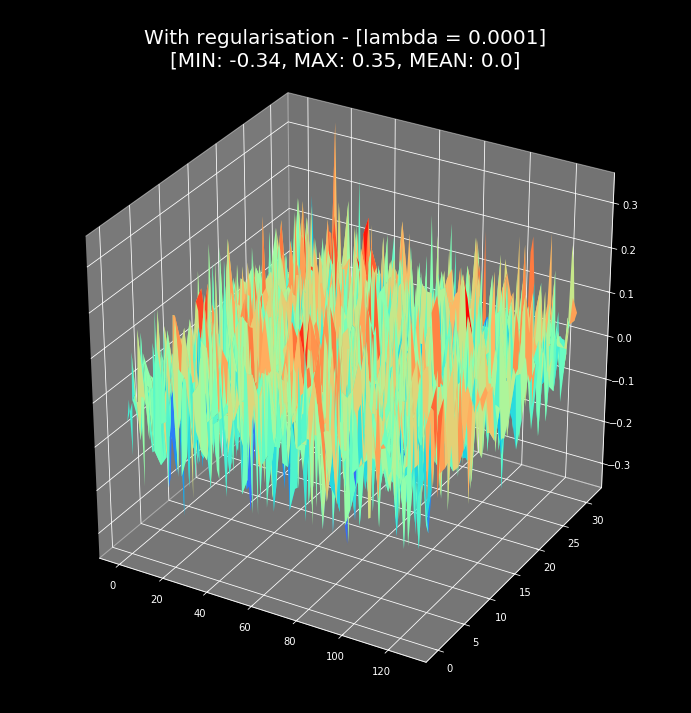

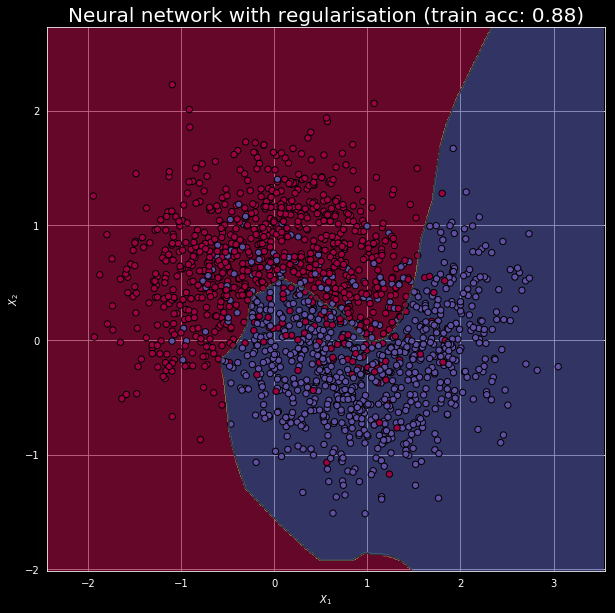

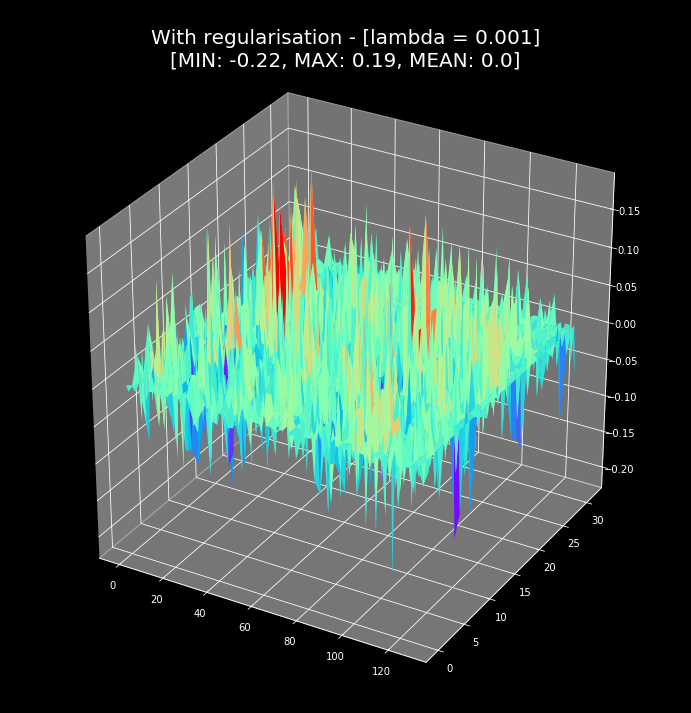

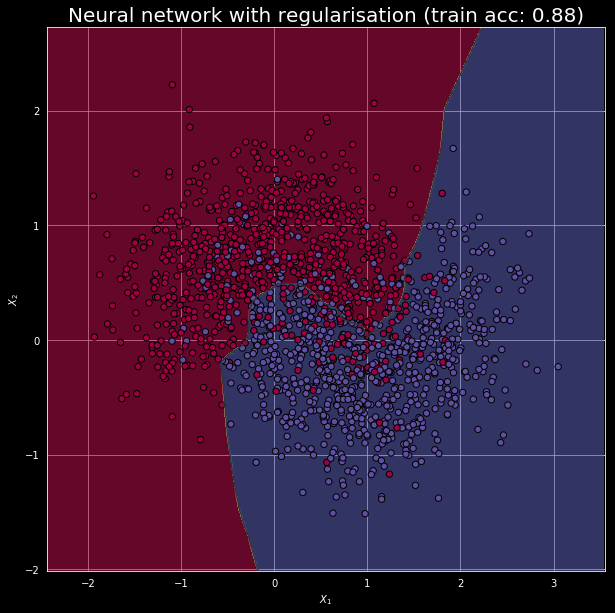

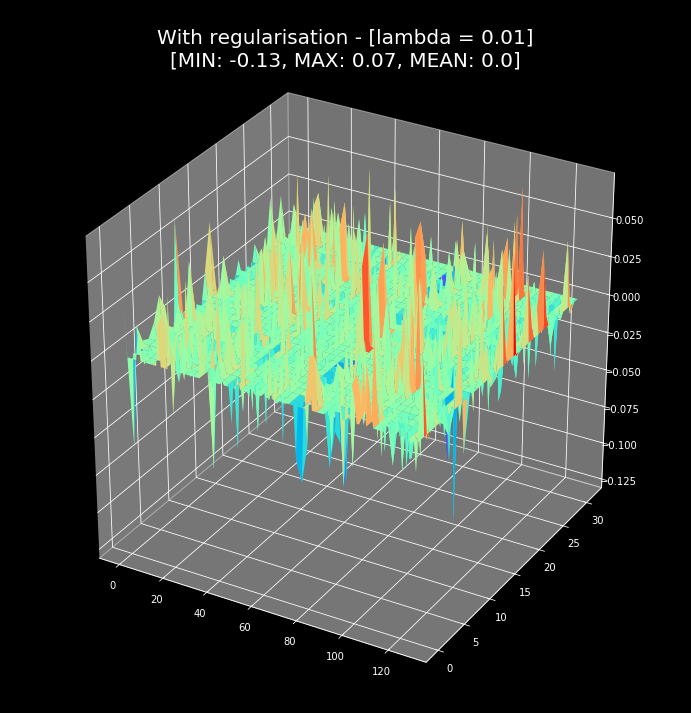

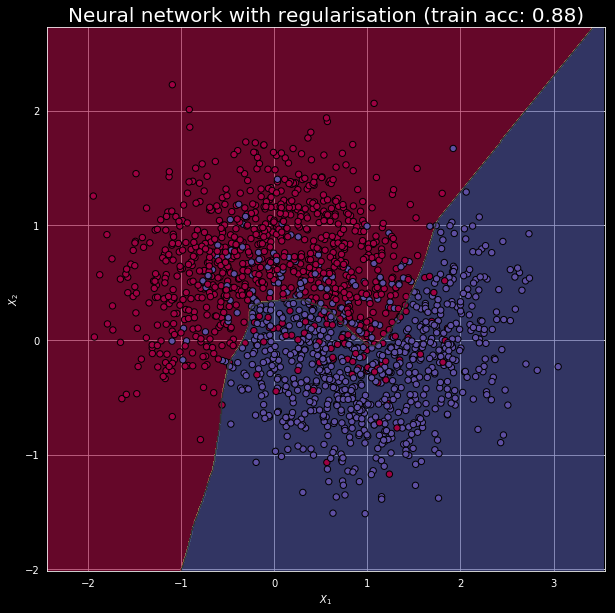

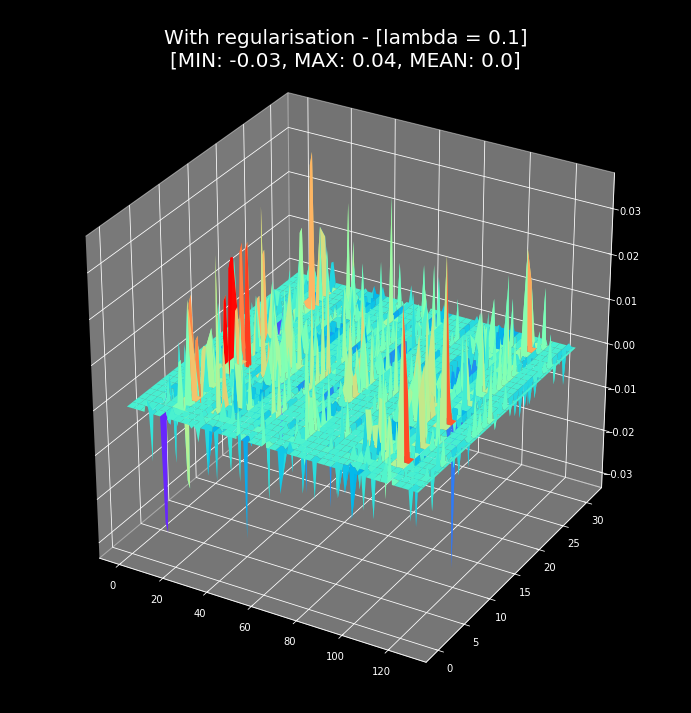

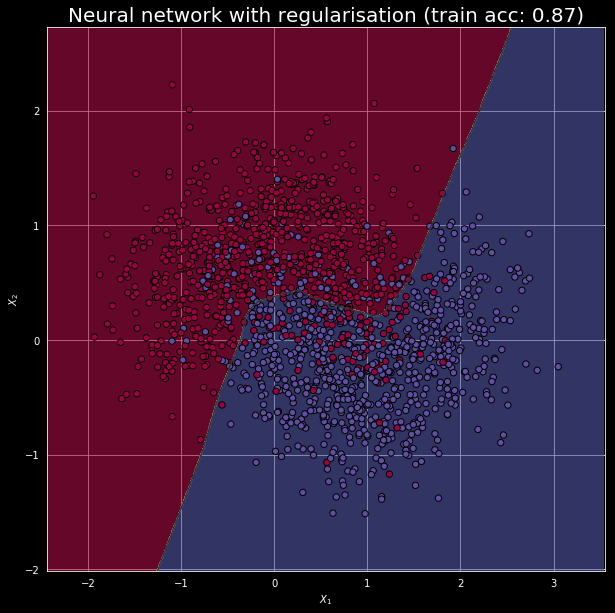

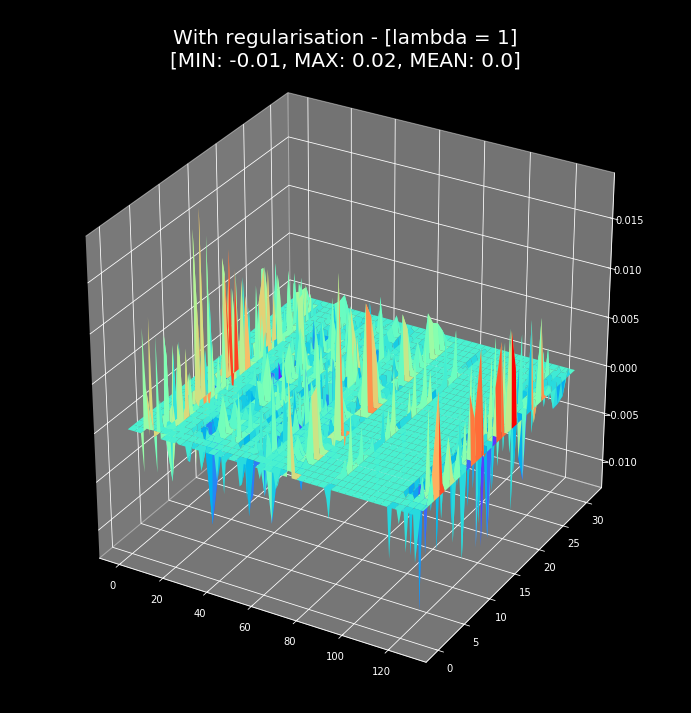

In [45]:
for i in range(-5, 1):
    _lambda = 10 ** i
    print("== MODEL FOR LAMBDA {} ==".format(str(_lambda)))

    model = build_model_with_regularization(_lambda)
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)
    
    y_train_pred = model.predict_classes(X_train)
    y_test_pred = model.predict_classes(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print("Train accuracy: " + str(train_acc))
    print("Test accuracy: " + str(test_acc))
    
    preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
    title = "Neural network with regularisation (train acc: {0:.2f})".format(train_acc)
    make_plot(X_train, y_train, title, XX, YY, preds)
    
    layer_index = 2
    plot_title = "With regularisation - [lambda = {}]".format(str(_lambda))
    plot_weights_matrix(model, layer_index, plot_title)